In [73]:
import pandas as pd

In [74]:
titanic = pd.read_csv("/content/train.csv")

In [75]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [76]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
titanic = titanic.set_index("PassengerId")

In [78]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
import seaborn as sb
import matplotlib.pyplot as plt


In [80]:
sex_counts = titanic['Sex'].value_counts()
sex_counts

,count
Sex,
male,577
female,314


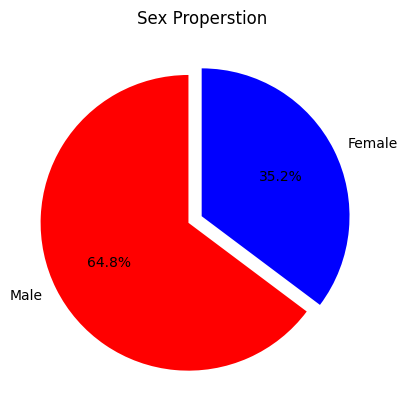

In [81]:
explode = (0.1, 0)  # Explode the first slice (male)
plt.pie(sex_counts, labels=sex_counts.index.str.capitalize(), autopct='%1.1f%%', startangle=90, explode=explode,colors=['red','blue'])
plt.title('Sex Properstion')
plt.show()

Text(0, 0.5, 'Fare Payed')

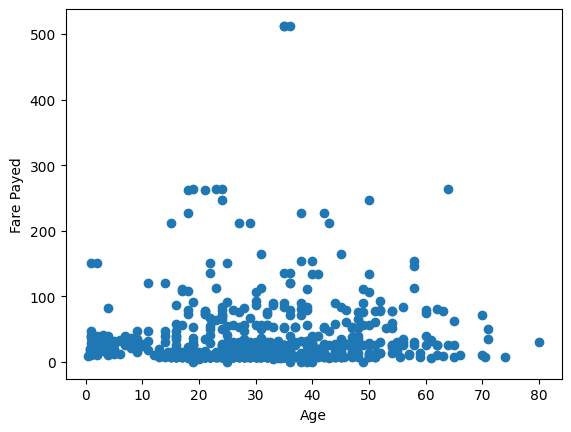

In [82]:
plt.scatter(x=titanic['Age'],y=titanic['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare Payed")

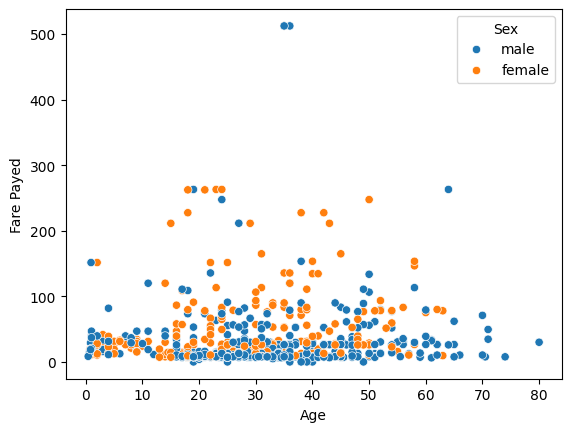

In [83]:
sb.scatterplot(x=titanic['Age'],y=titanic['Fare'],hue=titanic['Sex'])
plt.xlabel("Age")
plt.ylabel("Fare Payed")
plt.show()

In [84]:
S = titanic[(titanic['Survived']==1)==True]['Survived']

In [85]:
print(S.count())

342


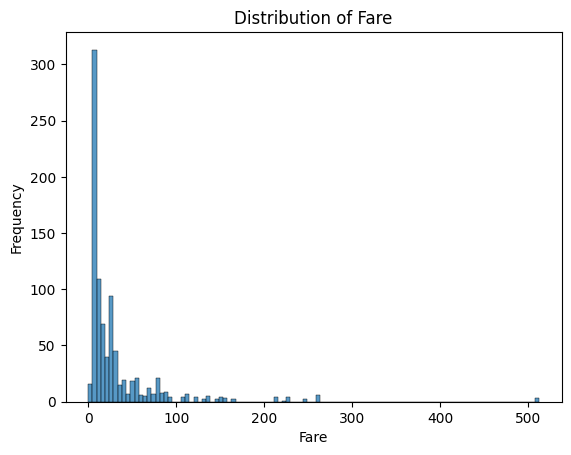

In [86]:
sb.histplot(titanic['Fare'])#,bins=10)
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("Distribution of Fare")
plt.show()

In [87]:
titanic_number =titanic.select_dtypes(include="number")
titanic_number

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


In [88]:
titanic_number.var()

,0
Survived,0.236772
Pclass,0.699015
Age,211.019125
SibSp,1.216043
Parch,0.649728
Fare,2469.436846


In [89]:
titanic_number.cov()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


In [90]:
titanic_number.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [91]:
titanic_number.std()

,0
Survived,0.486592
Pclass,0.836071
Age,14.526497
SibSp,1.102743
Parch,0.806057
Fare,49.693429


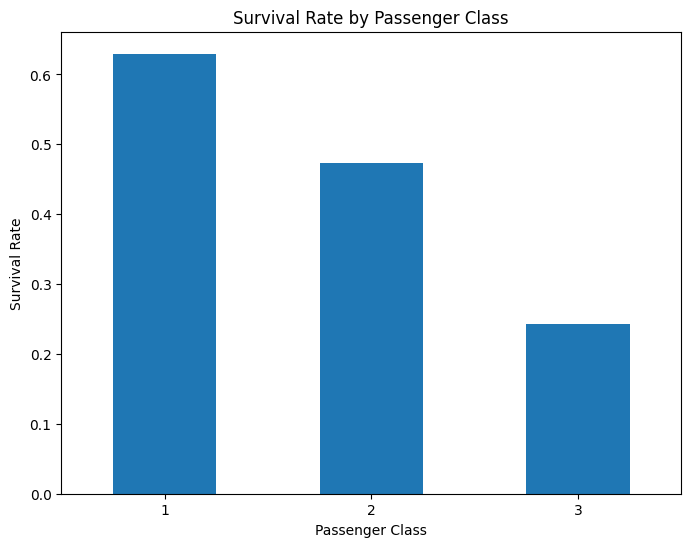

In [92]:
survival_rate_by_class = titanic.groupby('Pclass')['Survived'].mean()

plt.figure(figsize=(8, 6))
survival_rate_by_class.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()